In [1]:
import pandas as pd
import numpy as np

In [2]:
order_products_train_df = pd.read_csv('order_products__train.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
#order_products_prior_df.tail

In [4]:
aisles = pd.read_csv('aisles.csv')
aisles.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [3]:
departments  = pd.read_csv('departments.csv')
departments.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [5]:
orders = pd.read_csv('orders.csv')

orders.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [6]:
products = pd.read_csv('products.csv')

products.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [7]:
def draw(dataset, n=5):
    return dataset.take(np.random.permutation(len(dataset))[:n])

In [8]:
order_products_train_sample1= draw(order_products_train_df,1384617)  #1384617

In [9]:
#order_products_prior_sample1= draw(order_products_prior_df,30000000) #5000000

In [10]:
order_products_prior_sample1 = order_products_prior_df

In [11]:
order_products_train_sample1.tail()

,order_id,product_id,add_to_cart_order,reordered
273807,666605,32691,25,0
686301,1686407,30338,6,1
461468,1130224,48364,9,0
902292,2226948,11076,9,1
322576,785309,24838,3,1


In [12]:
order_products_train_sample1.shape

(1384617, 4)

In [12]:
order_products_prior_sample1.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [13]:
#train = 전체
merge_order_product_ds = order_products_train_sample1.merge\
(orders, on='order_id', how='inner')


#prior = 전체
merge_order_product_ds1 = order_products_prior_sample1.merge\
(orders, on='order_id', how='inner')

In [14]:
merge_order_product_ds.tail()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1384612,2421710,38944,1,1,69431,train,6,3,12,30.0
1384613,2190962,9716,1,1,199214,train,6,3,15,28.0
1384614,1184208,20946,1,0,184159,train,6,2,19,30.0
1384615,1411254,40396,1,0,92574,train,8,4,7,25.0
1384616,473041,27845,1,0,120910,train,4,4,16,30.0


In [15]:
merge_product_aisles_ds = products.merge\
(aisles , on = 'aisle_id' , how='left')

merge_product_aisles_ds.tail()

,product_id,product_name,aisle_id,department_id,aisle
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care
49687,49688,Fresh Foaming Cleanser,73,11,facial care


In [16]:
merge_product_aisles_departements_ds = merge_product_aisles_ds.merge\
(departments , on = 'department_id' , how='left')

merge_product_aisles_departements_ds.tail()

,product_id,product_name,aisle_id,department_id,aisle,department
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets
49687,49688,Fresh Foaming Cleanser,73,11,facial care,personal care


In [17]:
merge_train_ds =merge_order_product_ds.merge\
(merge_product_aisles_departements_ds , on = 'product_id' , how='left')
merge_train_ds.tail()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
1384612,2421710,38944,1,1,69431,train,6,3,12,30.0,Seven Grain Crispy Tenders,42,1,frozen vegan vegetarian,frozen
1384613,2190962,9716,1,1,199214,train,6,3,15,28.0,Premium Glacier Water,115,7,water seltzer sparkling water,beverages
1384614,1184208,20946,1,0,184159,train,6,2,19,30.0,"Rice, Calrose",63,9,grains rice dried goods,dry goods pasta
1384615,1411254,40396,1,0,92574,train,8,4,7,25.0,Guacamole,67,20,fresh dips tapenades,deli
1384616,473041,27845,1,0,120910,train,4,4,16,30.0,Organic Whole Milk,84,16,milk,dairy eggs


In [18]:
merge_train_ds.tail()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
1384612,2421710,38944,1,1,69431,train,6,3,12,30.0,Seven Grain Crispy Tenders,42,1,frozen vegan vegetarian,frozen
1384613,2190962,9716,1,1,199214,train,6,3,15,28.0,Premium Glacier Water,115,7,water seltzer sparkling water,beverages
1384614,1184208,20946,1,0,184159,train,6,2,19,30.0,"Rice, Calrose",63,9,grains rice dried goods,dry goods pasta
1384615,1411254,40396,1,0,92574,train,8,4,7,25.0,Guacamole,67,20,fresh dips tapenades,deli
1384616,473041,27845,1,0,120910,train,4,4,16,30.0,Organic Whole Milk,84,16,milk,dairy eggs


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [21]:
merge_train_ds.eval_set.value_counts()

train    1384617
Name: eval_set, dtype: int64

In [22]:
#merge_train_ds.product_id.value_counts()

In [23]:
grouped =  merge_train_ds.groupby("product_id")["reordered"].aggregate({'Total_reorders':'count'}).reset_index()

C:\Python3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [24]:
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped.sort_values(by='Total_reorders', ascending=False)[:10]
grouped

,product_id,Total_reorders,product_name
19574,24852,18726,Banana
10367,13176,15480,Bag of Organic Bananas
16685,21137,10894,Organic Strawberries
17300,21903,9784,Organic Baby Spinach
37499,47626,8135,Large Lemon
37609,47766,7409,Organic Avocado
37164,47209,7293,Organic Hass Avocado
13228,16797,6494,Strawberries
20648,26209,6033,Limes
22024,27966,5546,Organic Raspberries


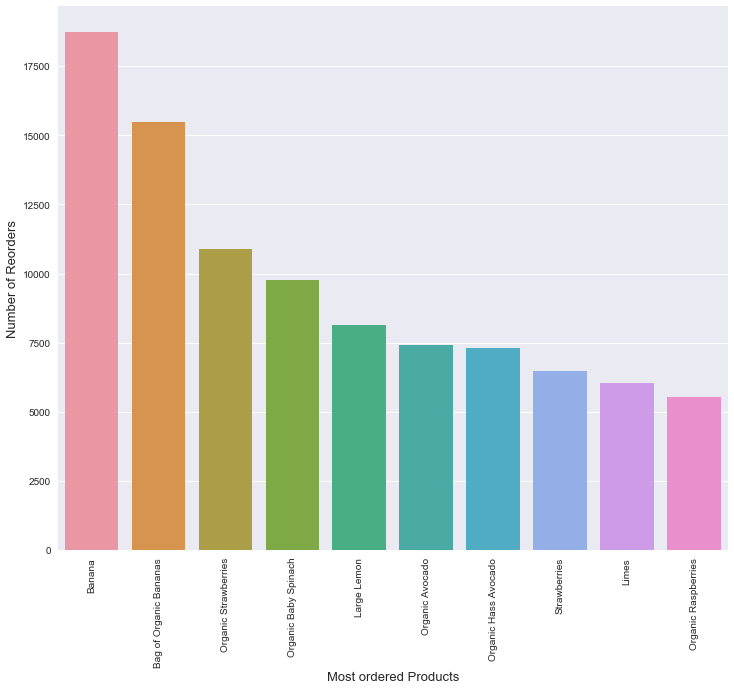

In [25]:
grouped  = grouped.groupby(['product_name']).sum()['Total_reorders'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

In [26]:
grouped = merge_train_ds.groupby("reordered")["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped['Ratios'] = grouped["Total_products"].apply(lambda x: x /grouped['Total_products'].sum())
grouped

C:\Python3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,reordered,Total_products,Ratios
0,0,555793,0.401406
1,1,828824,0.598594


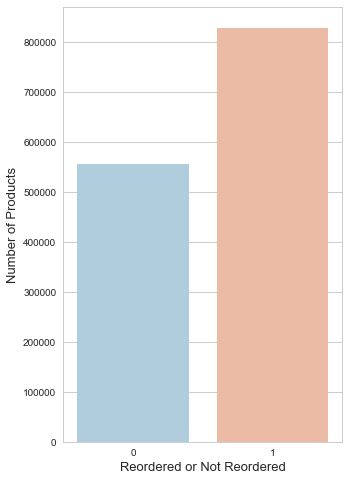

In [27]:
grouped  = grouped.groupby(['reordered']).sum()['Total_products'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(grouped.index, grouped.values, palette='RdBu_r')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered or Not Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [28]:
grouped = merge_train_ds.groupby("product_id")["reordered"].aggregate({'reorder_sum': sum,'reorder_total': 'count'}).reset_index()
grouped['reorder_probability'] = grouped['reorder_sum'] / grouped['reorder_total']
grouped = pd.merge(grouped, products[['product_id', 'product_name']], how='left', on=['product_id'])
grouped = grouped[grouped.reorder_total > 75].sort_values(['reorder_probability'], ascending=False)[:10]
grouped

C:\Python3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,product_id,reorder_sum,reorder_total,reorder_probability,product_name
1374,1729,86,92,0.934783,2% Lactose Free Milk
16529,20940,336,368,0.913043,Organic Low Fat Milk
16610,21038,72,81,0.888889,Organic Spelt Tortillas
19574,24852,16557,18726,0.884172,Banana
100,117,106,120,0.883333,Petit Suisse Fruit
30852,39180,426,483,0.881988,Organic Lowfat 1% Milk
9723,12384,237,269,0.881041,Organic Lactose Free 1% Lowfat Milk
18956,24024,405,461,0.878525,1% Lowfat Milk
28917,36717,71,81,0.876543,Double Fiber Bread
30462,38689,1056,1206,0.875622,Organic Reduced Fat Milk


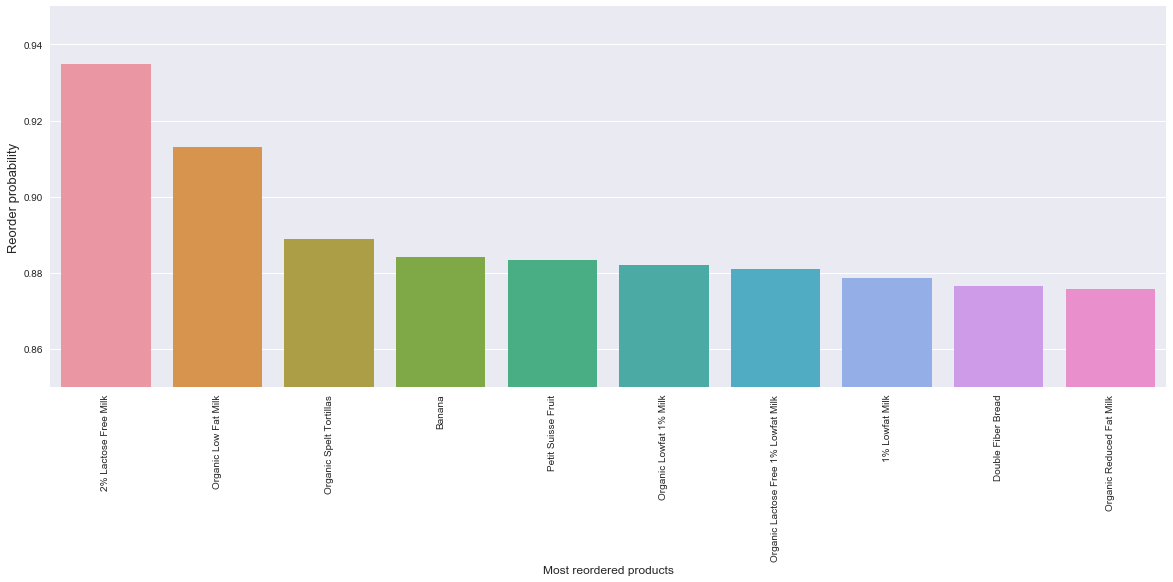

In [29]:
grouped  = grouped.groupby(['product_name']).sum()['reorder_probability'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(20, 7))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylim([0.85,0.95])
plt.ylabel('Reorder probability', fontsize=13)
plt.xlabel('Most reordered products', fontsize=12)
plt.show()

In [30]:
orders_na = (orders.isnull().sum() / len(orders)) * 100
orders_na = orders_na.drop(orders_na[orders_na == 0].index).sort_values(ascending=False)
orders_na

days_since_prior_order    6.027594
dtype: float64

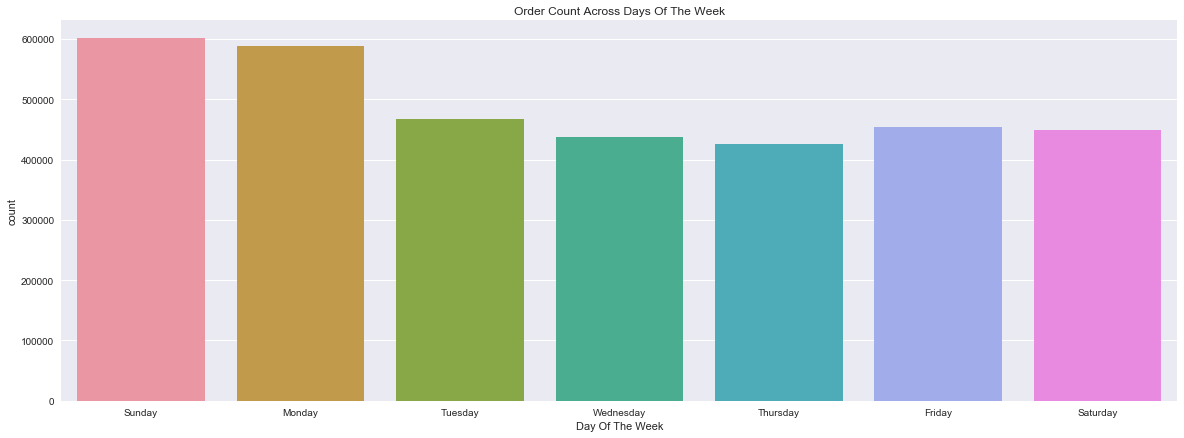

In [31]:
grouped = orders.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = grouped.order_dow.value_counts()
ordersDay = orders[["order_dow"]].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})
f, ax = plt.subplots(figsize=(20, 7))
sns.countplot(data=ordersDay,x="order_dow",ax=ax,order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax.set(xlabel='Day Of The Week',title="Order Count Across Days Of The Week")

#sns.barplot(grouped.index, grouped.values)
#plt.ylabel('Number of orders', fontsize=13)
#plt.xlabel('Days of order in a week', fontsize=13)
plt.show()

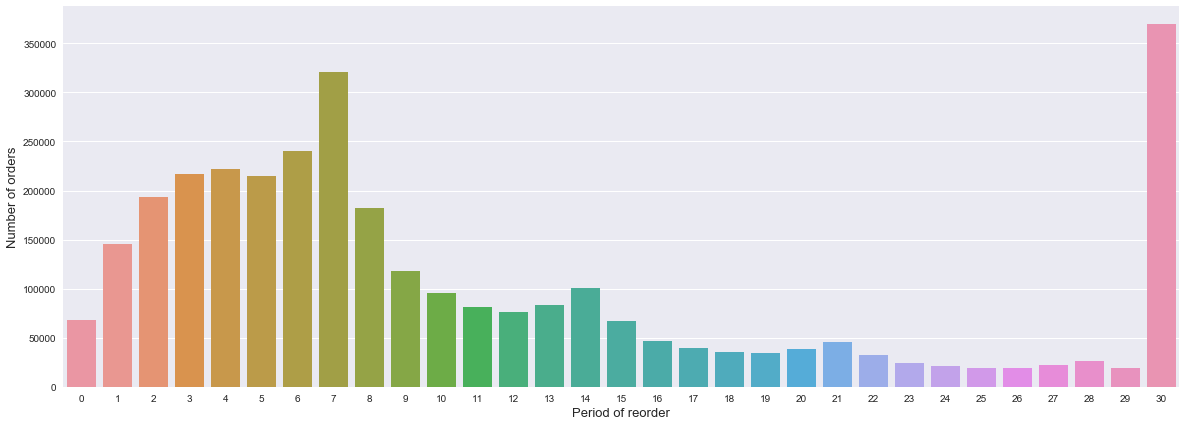

In [32]:
grouped = orders.groupby("order_id")["days_since_prior_order"].aggregate("sum").reset_index()
grouped = grouped.days_since_prior_order.value_counts()

from matplotlib.ticker import FormatStrFormatter
f, ax = plt.subplots(figsize=(20, 7))
sns.barplot(grouped.index, grouped.values)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Period of reorder', fontsize=13)
plt.show()

# Most important Aisles in each Department (by number of Products)

C:\Python3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


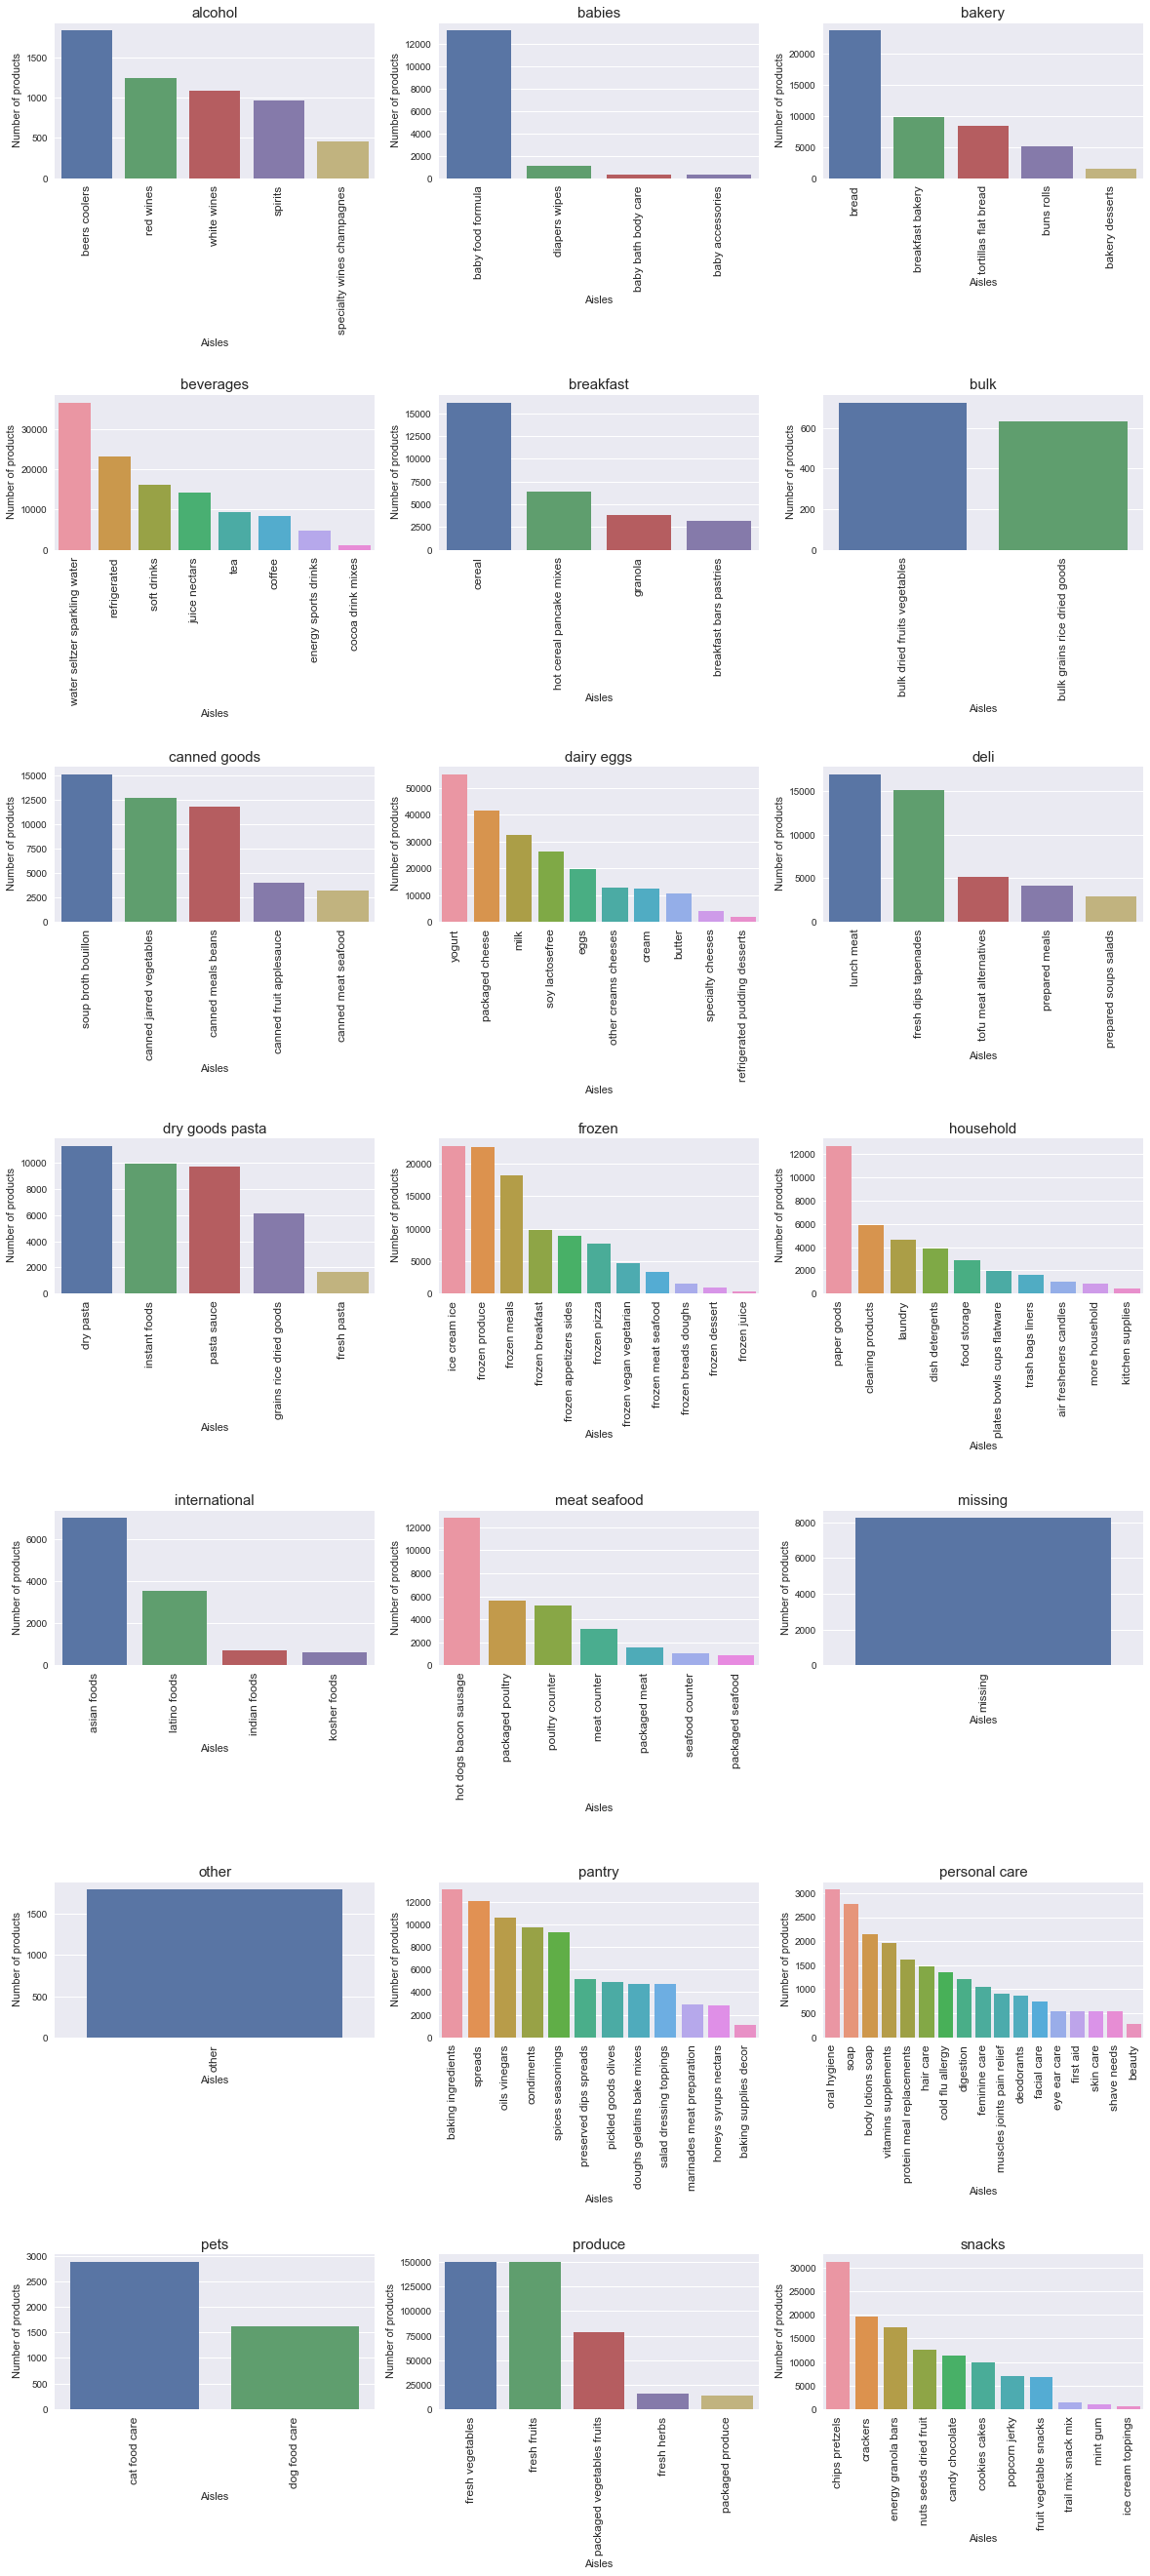

In [33]:
grouped = merge_train_ds.groupby(["department", "aisle"])["product_id"].aggregate({'Total_products': 'count'}).reset_index()
grouped.sort_values(by='Total_products', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.Total_products , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of products")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

plt.show()

## cart_num 별로 재구매 비율

In [34]:
grouped = merge_train_ds.groupby("add_to_cart_order")["reordered"].aggregate({'reorder_sum': sum,'reorder_total': 'count'}).reset_index()
grouped['reorder_probability'] = grouped['reorder_sum'] / grouped['reorder_total']
#grouped['reorder_probability'] = grouped['reorder_sum'] / grouped['add_cart_reorder_total']
#grouped = grouped[grouped.reorder_total > 75].sort_values(['reorder_probability'], ascending=False)[:10]
grouped.head()

C:\Python3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,add_to_cart_order,reorder_sum,reorder_total,reorder_probability
0,1,94817,131209,0.722641
1,2,86916,124364,0.698884
2,3,78150,116996,0.667972
3,4,70492,108963,0.646935
4,5,62744,100745,0.622800


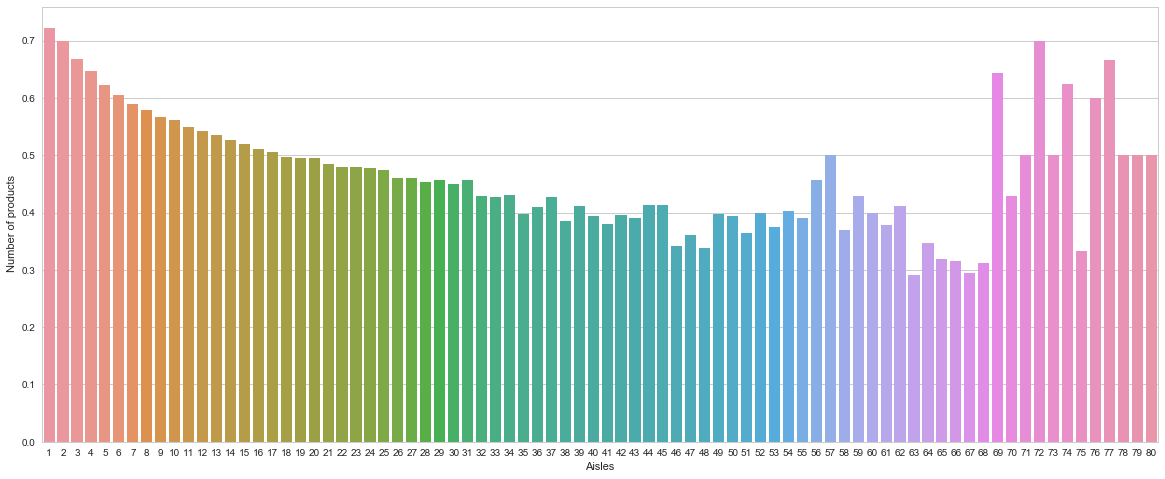

In [35]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(20, 8))

sns.barplot(grouped.add_to_cart_order, grouped.reorder_probability, ax=ax)
ax.set(xlabel = "Aisles", ylabel=" Number of products")

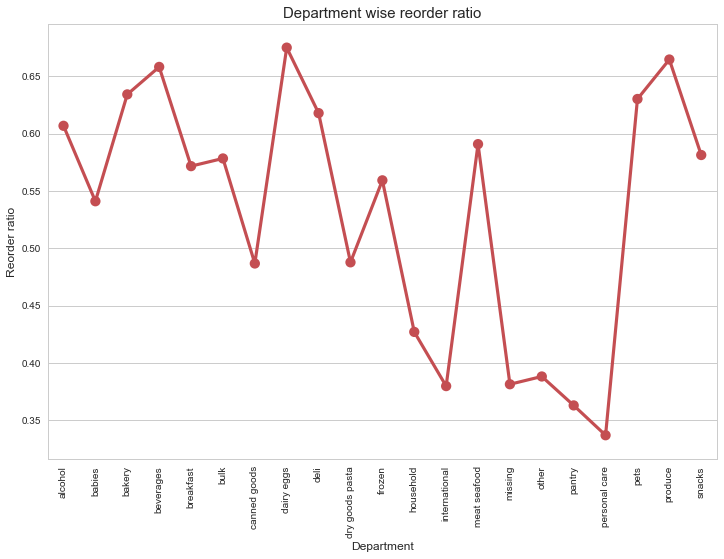

In [36]:
grouped =  merge_train_ds.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped['department'].values, grouped['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

## Association Analysis

In [20]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
#import apriori
from mlxtend.frequent_patterns import association_rules

In [21]:
merge_train_ds.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,181928,16840,50,0,88247,train,23,4,10,24.0,Mild Guacamole,67,20,fresh dips tapenades,deli
1,181928,37687,21,1,88247,train,23,4,10,24.0,Organic Spring Mix,123,4,packaged vegetables fruits,produce
2,181928,38809,20,1,88247,train,23,4,10,24.0,Lavender Lemonade,31,7,refrigerated,beverages
3,181928,27663,24,1,88247,train,23,4,10,24.0,GOLEAN Crunch! Cereal,121,14,cereal,breakfast
4,181928,40063,57,1,88247,train,23,4,10,24.0,Gluten Free Chocolate Chip Cookies,61,19,cookies cakes,snacks


In [22]:
merge_train_ds['product_name'] = merge_train_ds['product_name'].str.strip()
merge_train_ds.dropna(axis=0, subset=['order_id'], inplace=True)
merge_train_ds['order_id'] = merge_train_ds['order_id'].astype('str')
merge_train_ds = merge_train_ds[~merge_train_ds['order_id'].str.contains('C')]

In [23]:
merge_train_ds2 = merge_train_ds[:10000]

In [42]:
merge_train_ds.shape

(1000000, 15)

In [43]:
merge_train_ds

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2812866,16185,6,0,167101,train,4,6,12,13.0,Sharp Cheddar Cheese,21,16,packaged cheese,dairy eggs
1,2812866,25634,3,1,167101,train,4,6,12,13.0,Air Chilled Chicken Drumsticks,35,12,poultry counter,meat seafood
2,2812866,36164,2,1,167101,train,4,6,12,13.0,Organics Spinach,123,4,packaged vegetables fruits,produce
3,2812866,38689,1,0,167101,train,4,6,12,13.0,Organic Reduced Fat Milk,84,16,milk,dairy eggs
4,2812866,14553,5,0,167101,train,4,6,12,13.0,Oats & Honey Granola,57,14,granola,breakfast
5,2812866,30442,4,0,167101,train,4,6,12,13.0,Low Fat Vanilla Yogurt,120,16,yogurt,dairy eggs
6,2439828,35413,4,1,11297,train,7,0,17,26.0,Freshly made pasta layered between a rich meat...,38,1,frozen meals,frozen
7,2439828,4565,11,1,11297,train,7,0,17,26.0,Baked Snack Crackers Original,78,19,crackers,snacks
8,2439828,7116,2,1,11297,train,7,0,17,26.0,Large Enriched Bread,112,3,bread,bakery
9,2439828,18019,6,1,11297,train,7,0,17,26.0,Macaroni & Cheese Dinner Original Flavor,4,9,instant foods,dry goods pasta


In [24]:
basket = (merge_train_ds2
          .groupby(['order_id','product_name'])['order_number']
          .sum().unstack()
          .reset_index().fillna(0)  #
          .set_index('order_id')
         )

In [75]:
#basket

In [25]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
#basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [26]:
basket_sets.head()

product_name,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,1 % Lowfat Milk,1 Apple + 1 Pear Fruit Bar,1 Liter,1 Mg Melatonin Sublingual Orange Tablets,1 Razor Handle and 2 Freesia Scented Razor Refills Premium BladeRazor System,1% Lowfat Milk,1% Lowfat Vanilla Milk,1/3 Less Fat Cream Cheese,...,Zero Ion4 Grape Sports Drink,Zero Non-Chlorine Bleach,Zero Strawberry Lemon,Zesty Lemon Sorbet,Zucchini Squash,for Tots Apple Juice,gelato Coffee Toffee,of Hanover 100 Calorie Pretzels Mini,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate
order_id,,,,,,,,,,,,,,,,,,,,,
1002020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1010742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)##

In [65]:
merge_train_ds.shape

(1000000, 15)

In [33]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)  #


In [34]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.01) ]

,antecedants,consequents,support,confidence,lift
0,(Bag of Organic Bananas),(100% Raw Coconut Water),0.161840,0.063158,2.648120
1,(100% Raw Coconut Water),(Bag of Organic Bananas),0.023850,0.428571,2.648120
2,(Organic Hass Avocado),(100% Raw Coconut Water),0.103918,0.098361,4.124122
3,(100% Raw Coconut Water),(Organic Hass Avocado),0.023850,0.428571,4.124122
4,(Bag of Organic Bananas),(Asparagus),0.161840,0.084211,1.300831
5,(Asparagus),(Bag of Organic Bananas),0.064736,0.210526,1.300831
6,(Banana),(Asparagus),0.177172,0.067308,1.039727
7,(Asparagus),(Banana),0.064736,0.184211,1.039727
8,(Large Lemon),(Asparagus),0.103918,0.163934,2.532355
9,(Asparagus),(Large Lemon),0.064736,0.263158,2.532355


# Model :xgboost

In [35]:
import xgboost as xgb

In [36]:
xgbr = xgb.XGBRegressor(n_estimators=100)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(var, Dog.OutcomeTypedum, test_size=0.25)

NameError: name 'var' is not defined